In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Cargar dataset desde OpenML
df = pd.read_csv("C:\\Users\\abuen\\OneDrive\\00 - BUSINNESS INTELLIGENCE\\MODULO_2\\DATASET\\transfusion.csv")


## Exploracion de datos 

In [6]:
## Visualizacion del dataframe
df.head(20)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


In [7]:
# Renombrar el nombre de las columnas
df.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'DonatedBlood']

In [8]:
# Ver resumen
print(df.info())
print(df.describe())
print(df['DonatedBlood'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Recency       748 non-null    int64
 1   Frequency     748 non-null    int64
 2   Monetary      748 non-null    int64
 3   Time          748 non-null    int64
 4   DonatedBlood  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB
None
          Recency   Frequency      Monetary        Time  DonatedBlood
count  748.000000  748.000000    748.000000  748.000000    748.000000
mean     9.506684    5.514706   1378.676471   34.282086      0.237968
std      8.095396    5.839307   1459.826781   24.376714      0.426124
min      0.000000    1.000000    250.000000    2.000000      0.000000
25%      2.750000    2.000000    500.000000   16.000000      0.000000
50%      7.000000    4.000000   1000.000000   28.000000      0.000000
75%     14.000000    7.000000   1750.000000   50.000000      0.000000
max  

### Data Dictionary
- Recency — months since the last donation
- Frequency — total number of donation
- Monetary — total blood donated in c.c.
- Time — months since the first donation

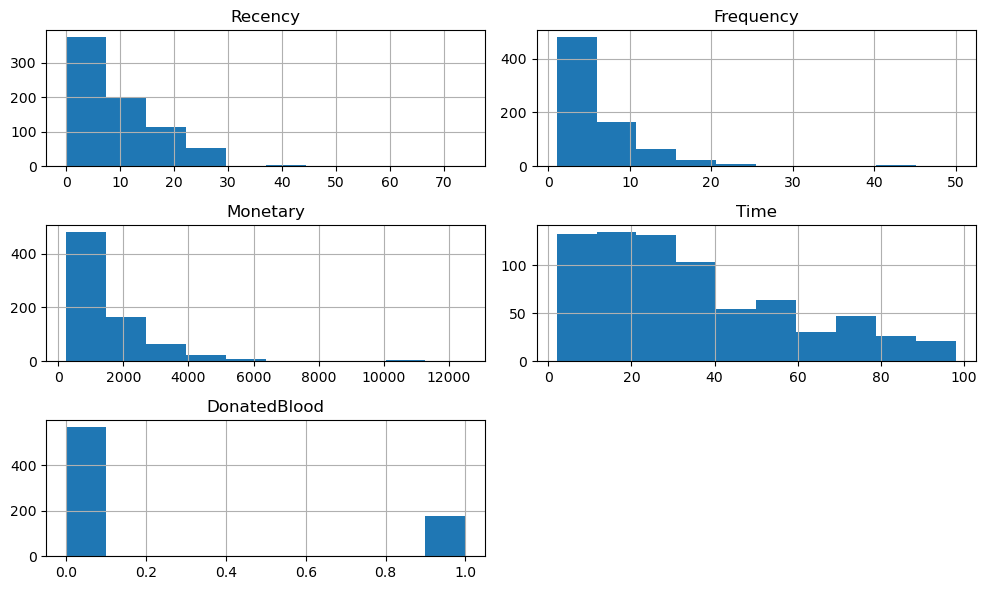

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de las variables
df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

In [10]:
print(df.describe())

          Recency   Frequency      Monetary        Time  DonatedBlood
count  748.000000  748.000000    748.000000  748.000000    748.000000
mean     9.506684    5.514706   1378.676471   34.282086      0.237968
std      8.095396    5.839307   1459.826781   24.376714      0.426124
min      0.000000    1.000000    250.000000    2.000000      0.000000
25%      2.750000    2.000000    500.000000   16.000000      0.000000
50%      7.000000    4.000000   1000.000000   28.000000      0.000000
75%     14.000000    7.000000   1750.000000   50.000000      0.000000
max     74.000000   50.000000  12500.000000   98.000000      1.000000


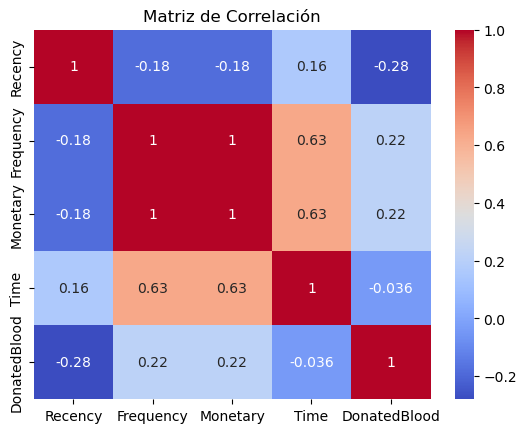

In [11]:
# Correlación
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

### Entrenamiento del Modelo (Valiable Objetivo Donate Blood)

In [31]:
from sklearn.model_selection import train_test_split

# Variables predictoras y objetivo
X = df[['Recency', 'Frequency', 'Monetary', 'Time']]
y = df['DonatedBlood']

# División entrenamiento/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### ✅ Código para comparar los 3 modelos

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

print("Clases")
print ("- 0	No donante (una persona que NO donó sangre). ")
print ("- 1	Donante (una persona que SÍ donó sangre) \n")

# MODELO 1: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))


# MODELO 2: Regresión Logística (NO balanceada)
log_unbalanced = LogisticRegression(random_state=42, max_iter=1000)
log_unbalanced.fit(X_train, y_train)
y_pred_log_unbalanced = log_unbalanced.predict(X_test)
print("\n=== Regresión Logística (NO balanceada) ===")
print(classification_report(y_test, y_pred_log_unbalanced))

""" # MODELO 3: Regresión Logística (Balanceada)
log_balanced = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
log_balanced.fit(X_train, y_train)
y_pred_log_balanced = log_balanced.predict(X_test)
print("\n=== Regresión Logística (Balanceada) ===")
print(classification_report(y_test, y_pred_log_balanced)) """

# MODELO 4: Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
print("\n=== Árbol de Decisión ===")
print(classification_report(y_test, y_pred_tree))




Clases
- 0	No donante (una persona que NO donó sangre). 
- 1	Donante (una persona que SÍ donó sangre) 

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.78      0.88      0.82       113
           1       0.39      0.24      0.30        37

    accuracy                           0.72       150
   macro avg       0.59      0.56      0.56       150
weighted avg       0.68      0.72      0.70       150


=== Regresión Logística (NO balanceada) ===
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       113
           1       0.57      0.11      0.18        37

    accuracy                           0.76       150
   macro avg       0.67      0.54      0.52       150
weighted avg       0.72      0.76      0.69       150


=== Árbol de Decisión ===
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       113
           1       0.26      0.22      

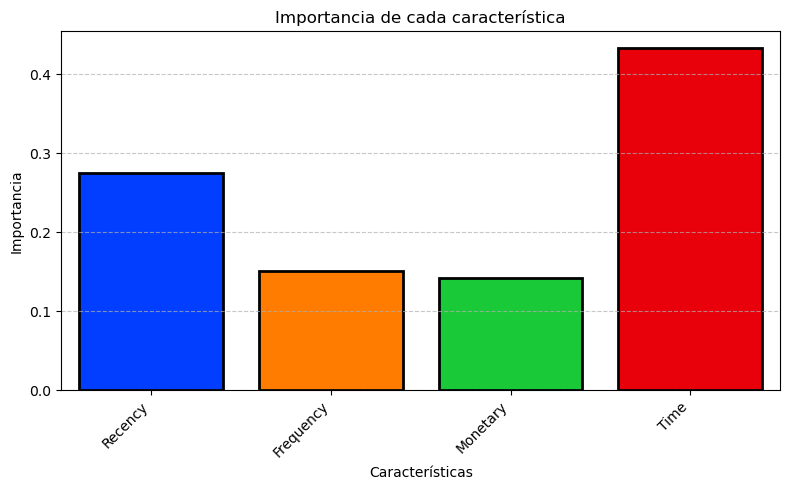

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Lista de características
features = ['Recency', 'Frequency', 'Monetary', 'Time']

# Entrenar modelo
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Obtener importancias
importances = model.feature_importances_
importances_dict = dict(zip(X.columns, importances))
importances_ordered = [importances_dict.get(feature, 0) for feature in features]

# Graficar
plt.figure(figsize=(8, 5))
sns.barplot(x=features, y=importances_ordered, hue=features, legend=False,
            palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title("Importancia de cada característica")
plt.ylabel("Importancia")
plt.xlabel("Características")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



### Manejo de Muestras Imbalanceadas

🎯 Este balanceo se hace para evitar que modelos de clasificación como regresión logística o árboles de decisión se inclinen hacia la clase mayoritaria, lo cual es común cuando hay desbalance de clases.

In [ ]:
from sklearn.utils import resample

# Separar clases
df_majority = df[df.DonatedBlood == 0]
df_minority = df[df.DonatedBlood == 1]

# Submuestreo de la clase mayoritaria
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

# Concatenar
df_balanced = pd.concat([df_majority_downsampled, df_minority])
df_balanced['DonatedBlood'].value_counts() 

DonatedBlood
0    178
1    178
Name: count, dtype: int64

In [23]:
df_minority_upsampled = resample(
    df_minority, 
    replace=True,               # con reemplazo → se pueden repetir
    n_samples=len(df_majority),# igualar tamaño de la clase 0
    random_state=42
)

# Combinar clases
df_balanced = pd.concat([df_majority, df_minority_upsampled])

In [24]:
print(df_minority_upsampled)

     Recency  Frequency  Monetary  Time  DonatedBlood
323       14          8      2000    50             1
263        2          3       750    38             1
20         2          3       750     4             1
335       16          3       750    21             1
165        2          1       250     2             1
..       ...        ...       ...   ...           ...
538        2          8      2000    38             1
119        2         11      2750    79             1
64         2          3       750     9             1
365       14          2       500    21             1
74         2          2       500     4             1

[570 rows x 5 columns]


In [25]:
# Separar X e y
X_balanced = df_balanced[['Recency', 'Frequency', 'Monetary', 'Time']]
y_balanced = df_balanced['DonatedBlood']

# Dividir entre entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Modelo 1: Random Forest
rf_bal = RandomForestClassifier(random_state=42)
rf_bal.fit(X_train_bal, y_train_bal)
print("=== Random Forest (balanced data) ===")
print(classification_report(y_test_bal, rf_bal.predict(X_test_bal)))

# Modelo 2: Regresión Logística NO balanceada
log_unbal = LogisticRegression(random_state=42, max_iter=1000)
log_unbal.fit(X_train_bal, y_train_bal)
print("\n=== Regresión Logística (NO balanceada, balanced data) ===")
print(classification_report(y_test_bal, log_unbal.predict(X_test_bal)))

# # Modelo 3: Regresión Logística balanceada (aunque ya está balanceado el dataset)
# log_bal = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
# log_bal.fit(X_train_bal, y_train_bal)
# print("\n=== Regresión Logística (balanceada, balanced data) ===")
# print(classification_report(y_test_bal, log_bal.predict(X_test_bal)))

# Modelo 4: Árbol de Decisión
tree_bal = DecisionTreeClassifier(random_state=42)
tree_bal.fit(X_train_bal, y_train_bal)
print("\n=== Árbol de Decisión (balanced data) ===")
print(classification_report(y_test_bal, tree_bal.predict(X_test_bal)))


=== Random Forest (balanced data) ===
              precision    recall  f1-score   support

           0       0.92      0.65      0.76       128
           1       0.67      0.93      0.78       100

    accuracy                           0.77       228
   macro avg       0.80      0.79      0.77       228
weighted avg       0.81      0.77      0.77       228


=== Regresión Logística (NO balanceada, balanced data) ===
              precision    recall  f1-score   support

           0       0.77      0.63      0.70       128
           1       0.62      0.76      0.68       100

    accuracy                           0.69       228
   macro avg       0.69      0.70      0.69       228
weighted avg       0.70      0.69      0.69       228


=== Árbol de Decisión (balanced data) ===
              precision    recall  f1-score   support

           0       0.91      0.70      0.79       128
           1       0.70      0.91      0.79       100

    accuracy                           0.

## 📊 Comparación de Modelos con Dataset Balanceado

| Modelo                                | Accuracy | F1-Score Clase 0 | F1-Score Clase 1 | Recall Clase 1 | Comentario clave |
|--------------------------------------|----------|------------------|------------------|----------------|------------------|
| **Random Forest**                    | 0.77     | 0.76             | 0.78             | 0.93           | Excelente recall para donantes, muy equilibrado. |
| **Regresión Logística (NO balanceada)** | 0.69     | 0.70             | 0.68             | 0.76           | Buen desempeño con dataset balanceado, aunque algo más débil en clase 0. |
| **Regresión Logística (balanceada)** | 0.68     | 0.69             | 0.67             | 0.74           | Muy similar a la no balanceada en este escenario. |
| **Árbol de Decisión**                | **0.79** | **0.79**         | **0.79**         | 0.91           | Mejor desempeño global, balanceado en ambas clases. ✅ |


## 📊 Comparación de Modelos con Dataset No Balanceado

| Modelo                                | Accuracy | F1-Score Clase 0 | F1-Score Clase 1 | Recall Clase 1 | Comentario clave |
|--------------------------------------|----------|------------------|------------------|----------------|------------------|
| **Random Forest**                    | 0.72     | 0.82             | 0.30             | 0.24           | Alto accuracy, pero muy mal identificando donantes. |
| **Regresión Logística (NO balanceada)** | 0.76     | 0.86             | 0.18             | 0.11           | Acierta bien los no donantes, pero casi ignora a los donantes. |
| **Regresión Logística (balanceada)** | 0.66     | 0.74             | 0.51             | 0.73           | Mucho mejor en recall de donantes, aunque baja el accuracy total. |
| **Árbol de Decisión**                | 0.65     | 0.78             | 0.24             | 0.22           | Algo mejor que Random Forest en clase 0, pero
